# Read CSV with TrackId and Genre Data

In [1]:
import pandas as pd

tracks_info_df = pd.read_csv('combined_dataset.csv')


# Read processed song data from pkl file

In [2]:
import pickle
import os


results_file = 'audio_features_backup.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as file:
        saved_data = pickle.load(file)
    X = saved_data.get('X', [])
    y_labels = saved_data.get('y_labels', [])
    
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")


Loaded 100390 processed tracks


# Preprocess

## Turn X into an np array for easier processing

In [3]:
import numpy as np

X = np.array(X)
print("shape of feature matrix X: ", X.shape)


shape of feature matrix X:  (100390, 55)


## Remove all entries where the genre is defined as None

In [4]:
import numpy as np

X = X[np.array(y_labels) != None]
y_labels = np.array(y_labels)[np.array(y_labels) != None]

genre_mapping = {
    'hip-hop': 'hip hop'
}

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]

In [5]:
y_labels_normalized_df = pd.DataFrame(y_labels_normalized)

# Count the frequency of each label in the "label" column
label_counts = y_labels_normalized_df.value_counts().reset_index()

# Rename the columns for clarity
label_counts.columns = ['Label', 'Frequency']

## Remap genres

### Replace sub-genres with their parent genre based on a predefined mapping

In [6]:
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rock rap': 'rap',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'hip-hop': 'hip hop',
    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]


### Map hip-hop to rap -> Models without this are too confused due to the genres being so alike

In [7]:
genre_mapping = {
    'hip hop': 'rap'
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels_normalized]

In [7]:
# Or remove hip hop

X = X[np.array(y_labels_normalized) != "hip hop"]
y_labels_normalized = np.array(y_labels_normalized)[np.array(y_labels_normalized) != "hip hop"]

### Run this code in case the last two cells were not executed

In [ ]:
y_labels_normalized = y_labels


### Extra: Keep only a popular type of genre

In [8]:
import numpy as np

original_labels_list = y_labels_normalized
y_labels_normalized = np.array(y_labels_normalized)

popular_genres = {
    'country', 'idm', 'black-metal', 'hardstyle', 'heavy-metal',
    'blues', 'rap', 'hip hop', 'classical', 'folk', 'rock-n-roll',
    'electronic', 'jazz', 'lo-fi', 'punk-rock', 'soul', 'punk',
    'rock'
}

#popular_genres = {
#    'pop', 'rock', 'rap', 'hip hop', 'metal', 'country', 'jazz',
#    'blues', 'classical', 'reggae', 'punk', 'funk', 'lo-fi', 'acid'
#    'r&b', 'soul', 'trap', 'techno', 'folk', 'indie', 'house'
#}

y_lower = np.array([genre.lower() for genre in y_labels_normalized])

mask = np.array([genre in popular_genres for genre in y_lower])

X = X[mask]
y_labels_normalized = y_labels_normalized[mask]

# Optional: print some info
print(f"Filtered dataset size: {len(y_labels_normalized)} entries (from {len(original_labels_list)} original)")

Filtered dataset size: 15248 entries (from 98347 original)


### Chart the leftover genres

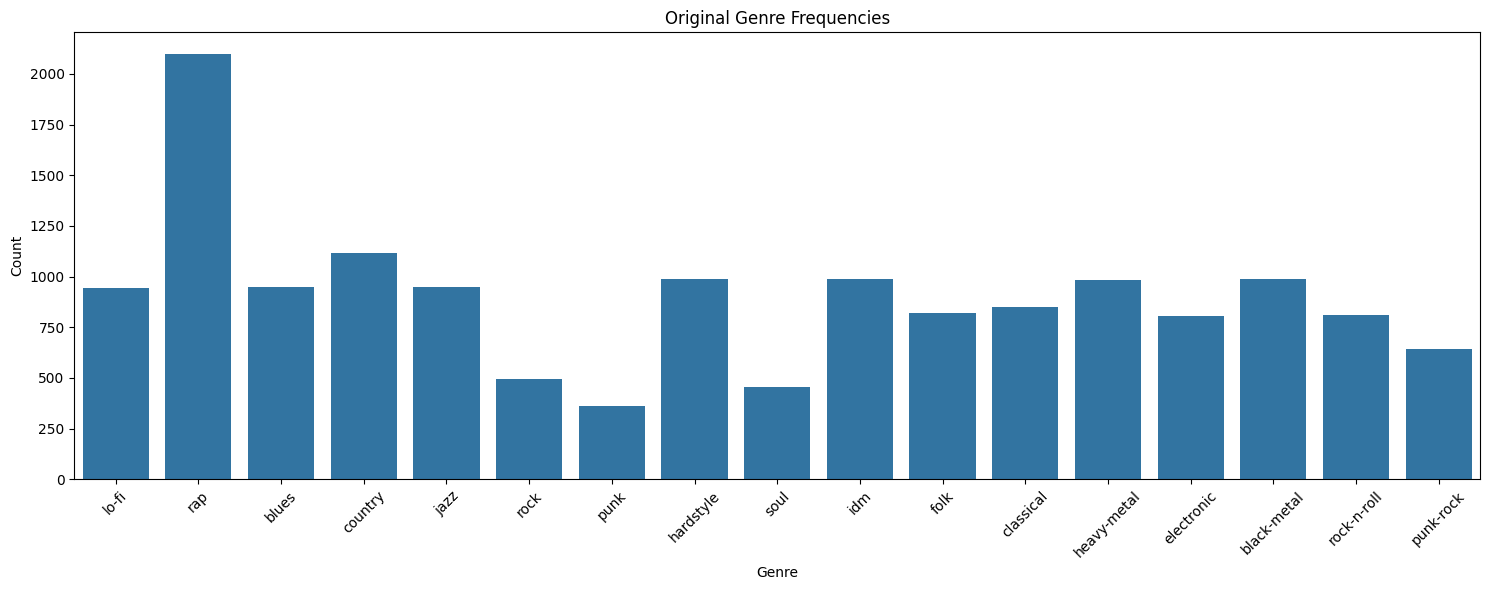

In [9]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


y = y_labels_normalized

freq_original = Counter(y)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'rap': 2100, 'country': 1117, 'idm': 989, 'black-metal': 989, 'hardstyle': 987, 'heavy-metal': 985, 'jazz': 948, 'blues': 947, 'lo-fi': 945, 'classical': 849, 'folk': 819, 'rock-n-roll': 813, 'electronic': 807, 'punk-rock': 642, 'rock': 494, 'soul': 457, 'punk': 360})


/tmp/ipykernel_24713/1765738642.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(le.classes_)


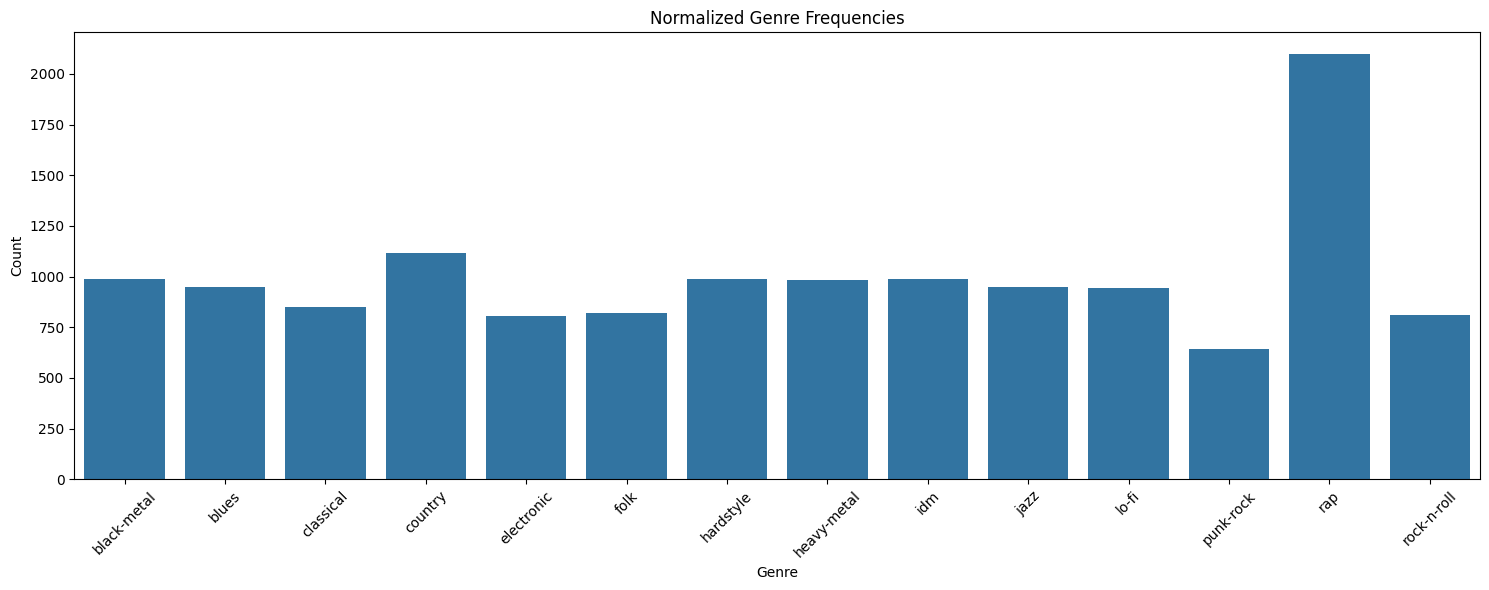

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples. At least 2  or any other % 2 == 0 number
n = 600
classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

y = np.array(y)

# Filter the data.
X_filtered = X_scaled[indices_to_keep]
y_filtered = y[indices_to_keep]

# Encode the Genres into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

fig, axs = plt.subplots(figsize=(15, 6))

# Plot normalized label frequencies.
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
axs.set_xticklabels(le.classes_)

plt.tight_layout()
plt.show()


# Remove highly collerating data

Dropping columns: ['feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_16', 'feature_20', 'feature_21', 'feature_23', 'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_34', 'feature_37', 'feature_41', 'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51', 'feature_53']


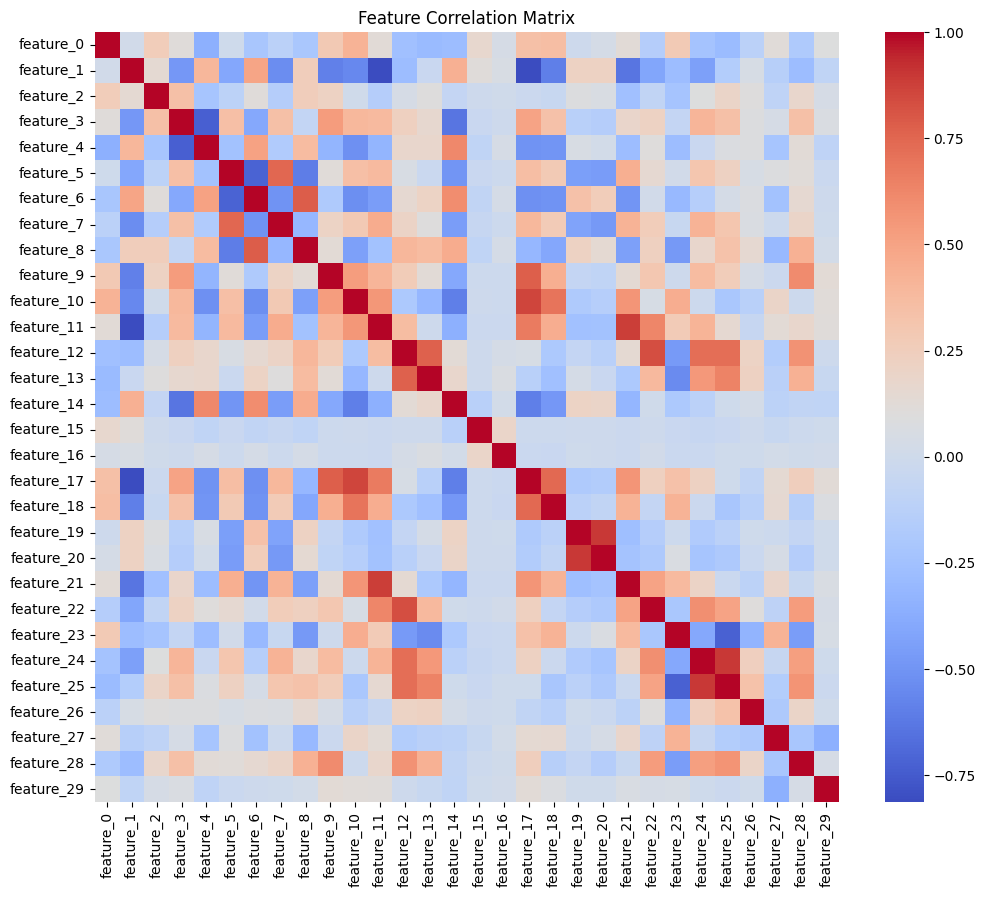

In [11]:
import pandas as pd
import numpy as np

CORRELATING_VALUE = 0.9

X = X_filtered

def remove_highly_correlated_features(X, threshold):
    # If X is a NumPy array, convert it to a DataFrame.
    if isinstance(X, np.ndarray):
        # Create column names if not provided
        X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    else:
        X_df = X.copy()
    
    # Compute the absolute correlation matrix
    corr_matrix = X_df.corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any feature with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Dropping columns:", to_drop)
    
    # Drop these columns from the dataframe
    X_df_reduced = X_df.drop(columns=to_drop)
    
    # If original X was a NumPy array, return as a NumPy array.
    if isinstance(X, np.ndarray):
        return X_df_reduced.values
    else:
        return X_df_reduced


X_reduced = remove_highly_correlated_features(X, threshold=CORRELATING_VALUE)

# -- Create a feature correlation matrix --
df_features = pd.DataFrame(X_reduced, columns=[f'feature_{i}' for i in range(X_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

X_filtered = X_reduced


# Create a Test-Train split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (11149, 30) (11149,)
Test set shape: (2788, 30) (2788,)


# Hyperparameter tuning

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import optuna
import numpy as np
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset, random_split

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

BATCH_SIZE = 128

# Convert numpy data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

EPOCHS = 50
EARLY_STOPPING_PATIENCE = 6

# Define model class
class CustomNet(nn.Module):
    def __init__(self, input_size, output_size, hp):
        super().__init__()
        self.layers = nn.Sequential()
        self.layers.add_module('fc1', nn.Linear(input_size, hp['units_1']))
        self.layers.add_module('act1', self.get_activation(hp['activation_1']))
        self.layers.add_module('drop1', nn.Dropout(hp['dropout_rate']))
        
        if hp['second_layer']:
            self.layers.add_module('fc2', nn.Linear(hp['units_1'], hp['units_2']))
            self.layers.add_module('act2', self.get_activation(hp['activation_2']))
            self.layers.add_module('drop2', nn.Dropout(hp['dropout_rate_2']))
            last_dim = hp['units_2']
        else:
            last_dim = hp['units_1']

        self.output_layer = nn.Linear(last_dim, output_size)

    def forward(self, x):
        x = self.layers(x)
        return self.output_layer(x)

    def get_activation(self, name):
        return {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'sigmoid': nn.Sigmoid()
        }[name]


def objective(trial):
    hp = {
        'activation_1': trial.suggest_categorical('activation_1', ['relu', 'tanh', 'sigmoid']),
        'units_1': trial.suggest_int('units_1', 16, 128, step=16),
        'dropout_rate': trial.suggest_float('dropout_rate', 0.0, 0.7, step=0.1),
        'second_layer': trial.suggest_categorical('second_layer', [True, False]),
        'activation_2': trial.suggest_categorical('activation_2', ['relu', 'tanh', 'sigmoid']),
        'units_2': trial.suggest_int('units_2', 16, 128, step=16),
        'dropout_rate_2': trial.suggest_float('dropout_rate_2', 0.0, 0.7, step=0.1),
        'learning_rate': trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 1e-2])
    }

    model = CustomNet(num_features, num_classes, hp).to(device)
    optimizer = optim.Adam(model.parameters(), lr=hp['learning_rate'])
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0
    patience, wait = EARLY_STOPPING_PATIENCE, 0

    for epoch in range(EPOCHS):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_loss /= len(train_loader)
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                output = model(X_batch)
                loss = criterion(output, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        val_acc = compute_accuracy(model, val_loader)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                break

    return best_val_acc


def compute_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    return correct / total

TRIAL_COUNT = 500

# Run Optuna random search
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=TRIAL_COUNT)

# Show best trial
print("Best Hyperparameters:")
print(study.best_params)

# Retrain final model on full training set with early stopping
best_hp = study.best_params
final_model = CustomNet(num_features, num_classes, best_hp).to(device)
optimizer = optim.Adam(final_model.parameters(), lr=best_hp['learning_rate'])
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping variables
best_val_loss = float('inf')
patience = EARLY_STOPPING_PATIENCE
epochs_no_improve = 0
best_model_state = None

for epoch in range(EPOCHS):
    # Training
    final_model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = final_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Validation
    final_model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = final_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct_val += (preds == y_batch).sum().item()
            total_val += y_batch.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct_val / total_val

    # Save history
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = final_model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

# Load best model state after training
if best_model_state is not None:
    final_model.load_state_dict(best_model_state)
    print("Restored best model weights based on validation loss.")


/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-25 14:57:48,684] A new study created in memory with name: no-name-fa4ae2a3-fd71-4c6e-a51d-840533da06ed
/tmp/ipykernel_24713/521000553.py:95: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/aten/src/ATen/native/Scalar.cpp:22.)
  train_loss += loss.item()
[I 2025-04-25 14:58:01,400] Trial 0 finished with value: 0.5778335724533716 and parameters: {'activation_1': 'tanh', 'units_1': 128, 'dropout_rate': 0.4, 'second_layer': False, 'activation_2': 'tanh', 'units_2': 32, 'dropout_rate_2': 0.4, 'learning_rate': 0.0001}. Best is trial 0 with value: 0.5778335724533716.
[I 2025-04-25 14:58:12,8

KeyboardInterrupt: 

# Evaluation Charts

## Confusion Matrix - Shows what was the predicted value compared to the true value when evaluating the Model

The more values in the diagonal line the better

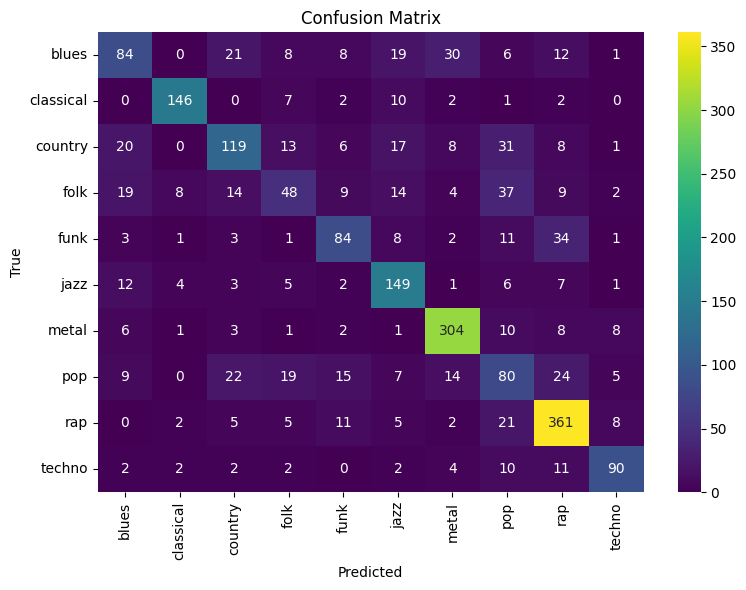

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Put model in eval mode
final_model.eval()

# Get predictions on test data
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:  # or test_loader if you named it that
        X_batch = X_batch.to(device)
        outputs = final_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

# Optionally inverse transform labels (if using LabelEncoder)
decoded_y_test = le.inverse_transform(all_labels)
decoded_y_pred = le.inverse_transform(all_preds)

# Create confusion matrix
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Loss and Accuracy Plots - Shows how the models loss and accuracy values changed during the training

The closer the lines to each other the better

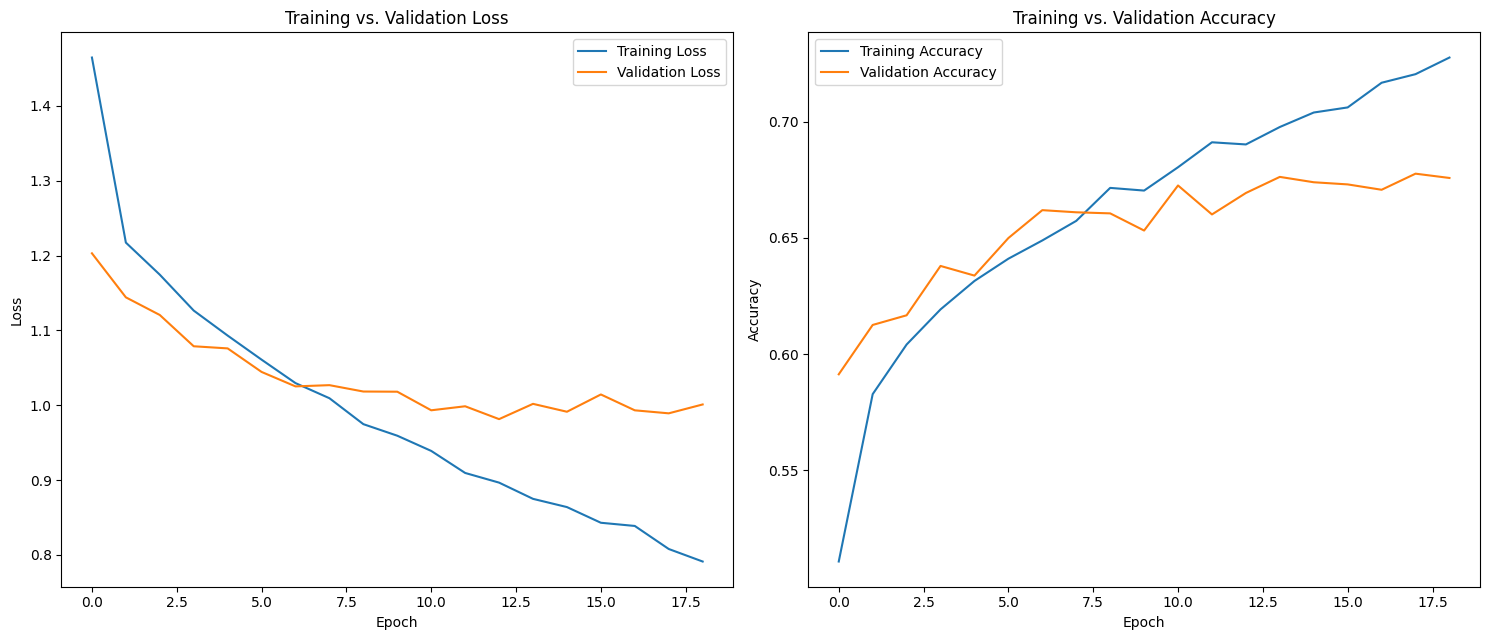

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6.5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Corrleation Matrix - How much the features correlate to each other 

Less correlating features is better

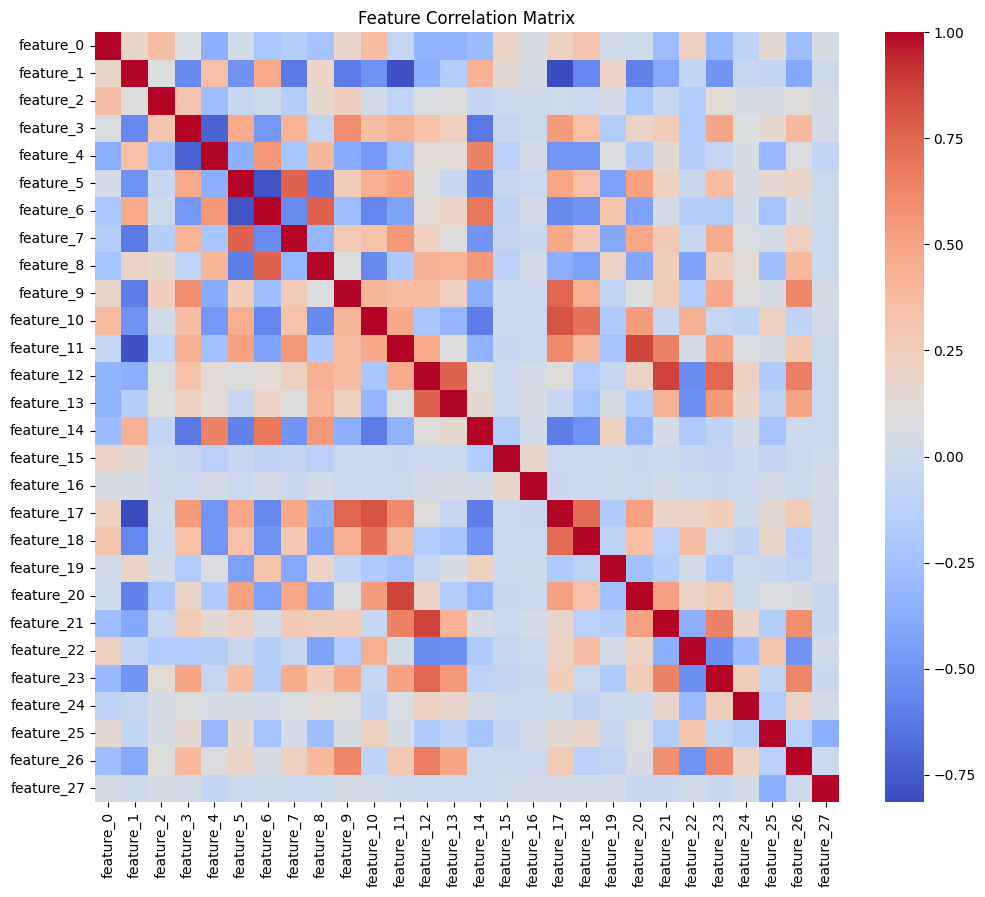

In [31]:
# Create a DataFrame for features. If X has many features, consider selecting a subset.
df_features = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Feature permutation importance - shows how much each feature was important in making a decision in the model

Potential: remove the non-important features

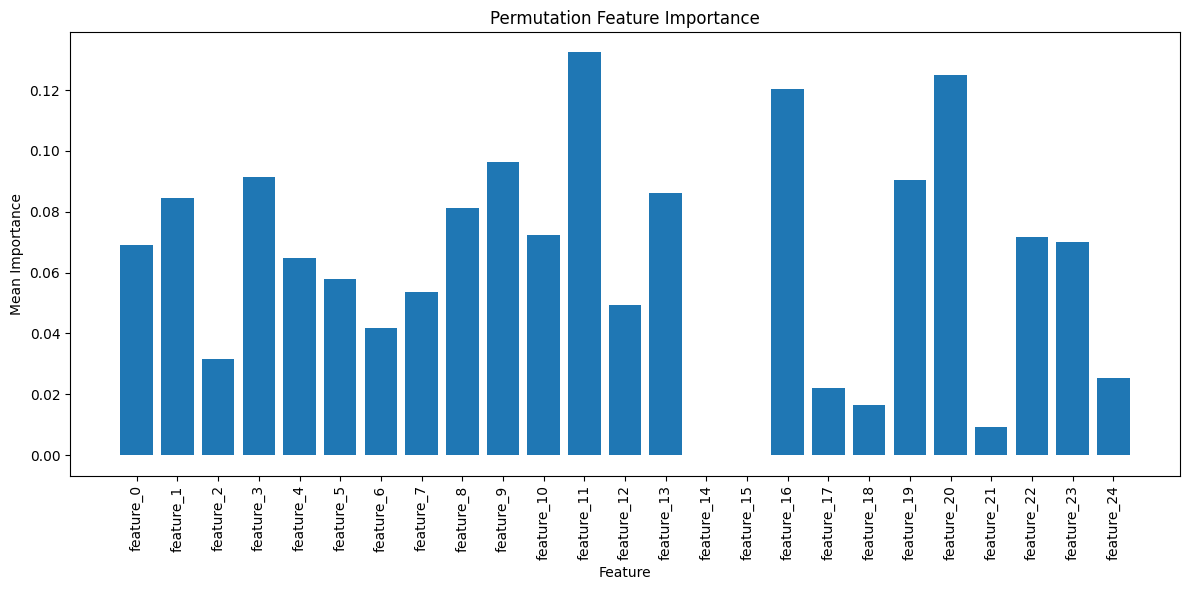

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

class TorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, device):
        self.model = model.to(device)
        self.device = device
        
    def fit(self, X, y):
        # Model is already trained
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            outputs = self.model(X_tensor)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
        return preds

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)
    
# Wrap the PyTorch model
wrapper = TorchClassifierWrapper(final_model, device=device)

# Compute permutation importance
result = permutation_importance(wrapper, X_test, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')

importance_means = result.importances_mean

features = [f'feature_{i}' for i in range(X_test.shape[1])]

plt.figure(figsize=(12, 6))
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


# Remove unimportant features

In [16]:
import numpy as np
import pandas as pd

# Assume importance_means and importance_threshold are already defined
importance_threshold = 0.01  # adjust this threshold as needed

# Check if X_train is a DataFrame, if not, convert it and assign column names.
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X_train_df = X_train.copy()

# Do the same for X_test.
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Identify the indices of features with importance greater than or equal to the threshold.
important_feature_indices = np.where(importance_means >= importance_threshold)[0]
print("Important feature indices:", important_feature_indices)

# Retrieve the names of the important features.
important_features = X_train_df.columns[important_feature_indices]
print("Important features:", important_features.tolist())

# Filter the training and test DataFrames to keep only the important features.
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

print("Original training shape:", X_train_df.shape)
print("Reduced training shape:", X_train_reduced.shape)

Important feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 22 23 24 25 28 29]
Important features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_18', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29']
Original training shape: (5012, 31)
Reduced training shape: (5012, 23)


# Re-run Hyperparameter search